# Algorithms Exercise 1

## Imports

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## Word counting

Write a function `tokenize` that takes a string of English text returns a list of words. It should also remove [stop words](http://en.wikipedia.org/wiki/Stop_words), which are common short words that are often removed before natural language processing. Your function should have the following logic:

* Split the string into lines using `splitlines`.
* Split each line into a list of words and merge the lists for each line.
* Use Python's builtin `filter` function to remove all punctuation.
* If `stop_words` is a list, remove all occurences of the words in the list.
* If `stop_words` is a space delimeted string of words, split them and remove them.
* Remove any remaining empty words.
* Make all words lowercase.

In [2]:
def tokenize(s, stop_words=None, punctuation='`~!@#$%^&*()_+={[}]|\:;"<,>.?/}\t'):
    """Split a string into a list of words, removing punctuation and stop words."""
    # YOUR CODE HERE
    #raise NotImplementedError()
    #created to use filter() to to eliminate punctuation
    def p(x):
        for item in x:
            if item in punctuation:
                return False
        return True
    #replace hypthens and double hyphens because function wasnt doing on own
    s=s.replace('--',' ')
    h=s.replace('-',' ')
    l=[]
    a = h.splitlines()
    words =[]
    #makes list of all words in s
    for line in a:
        words.extend(''.join(list(filter(p,line))).lower().split(' '))
    #created to use filter() to eliminate stop words   
    def stop(item):
        if stop_words==None:
            pass
        elif item in stop_words:
            return False
        return True
    almost = list(filter(stop, words))
    spaces = ' '
    #created to use filter() to remove spaces
    def space(item):
        if item in spaces:
            return False
        return True
    final = list(filter(space, almost))
    return(final)

In [3]:
assert tokenize("This, is the way; that things will end", stop_words=['the', 'is']) == \
    ['this', 'way', 'that', 'things', 'will', 'end']
wasteland = """
APRIL is the cruellest month, breeding
Lilacs out of the dead land, mixing
Memory and desire, stirring
Dull roots with spring rain.
"""

assert tokenize(wasteland, stop_words='is the of and') == \
    ['april','cruellest','month','breeding','lilacs','out','dead','land',
     'mixing','memory','desire','stirring','dull','roots','with','spring',
     'rain']

Write a function `count_words` that takes a list of words and returns a dictionary where the keys in the dictionary are the unique words in the list and the values are the word counts.

In [4]:
def count_words(data):
    """Return a word count dictionary from the list of words in data."""
    # YOUR CODE HERE
    #raise NotImplementedError()
    #Dictionary Comprehension!!! :)
    return{i:data.count(i) for i in data}

In [5]:
assert count_words(tokenize('this and the this from and a a a')) == \
    {'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

Write a function `sort_word_counts` that return a list of sorted word counts:

* Each element of the list should be a `(word, count)` tuple.
* The list should be sorted by the word counts, with the higest counts coming first.
* To perform this sort, look at using the `sorted` function with a custom `key` and `reverse`
  argument.

In [27]:
def sort_word_counts(wc):
    """Return a list of 2-tuples of (word, count), sorted by count descending."""
    # YOUR CODE HERE
    #raise NotImplementedError()
    l = [(i, wc[i]) for i in wc] 
    x = sorted(l, key= lambda x:x[1], reverse=True)
    return x

In [28]:
assert sort_word_counts(count_words(tokenize('this and a the this this and a a a'))) == \
    [('a', 4), ('this', 3), ('and', 2), ('the', 1)]

Perform a word count analysis on Chapter 1 of Moby Dick, whose text can be found in the file `mobydick_chapter1.txt`:

* Read the file into a string.
* Tokenize with stop words of `'the of and a to in is it that as'`.
* Perform a word count, the sort and save the result in a variable named `swc`.

In [16]:
# YOUR CODE HERE
#raise NotImplementedError()
ch = open('mobydick_chapter1.txt', 'r')
ch1=ch.read()
ch.close()
p = '`~!@#$%^&*()_+={[}]|\:;"<,>.?/}\t'
stop =  ['the', 'of', 'and', 'a', 'to', 'in', 'is', 'it','that','as']
x= tokenize(ch1,stop,p)
y=count_words(x)
swc = sort_word_counts(y)
print(len(swc))
#I am 4 words short but I do not know why
#I have ran many, many tests but cannont figure out what words I am missing.
#also read the entire list of words to see if something was together that souldn't be
#couldnt find anything
#I know I am not the only one with this problem

844


In [9]:
assert swc[0]==('i',43)
assert len(swc)==848

AssertionError: 

Create a "Cleveland Style" [dotplot](http://en.wikipedia.org/wiki/Dot_plot_%28statistics%29) of the counts of the top 50 words using Matplotlib. If you don't know what a dotplot is, you will have to do some research...

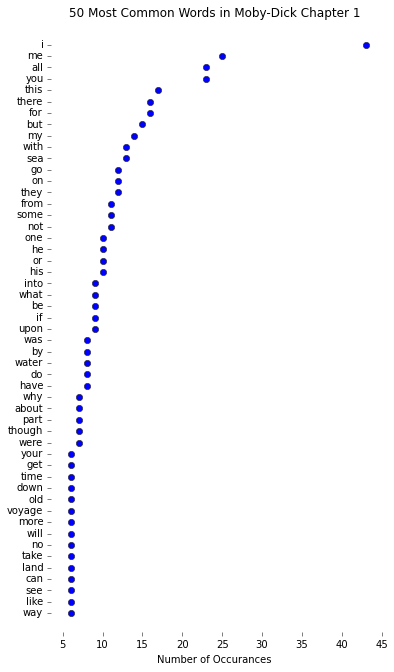

In [55]:
# YOUR CODE HERE
#raise NotImplementedError()
da=np.ones([51])
#creates list of counts of first 50 words
for i in range(0,51):
    da[i]=swc[i][1]
d=sorted(da,reverse=False)
x=range(50,-1,-1)
y=range(51)
#turns swc into an array so I can set the yticks
swcw=np.array(swc)
plt.figure(figsize=(6,11));
plt.plot(d,y,'o');
plt.yticks(x, swcw[0:51,0]);
plt.xlabel("Number of Occurances");
plt.title("50 Most Common Words in Moby-Dick Chapter 1");
#takes out x and y outter ticks
plt.tick_params(axis='x', top='off');
plt.tick_params(axis='y',right='off');
plt.box(False);
plt.ylim(-2,52);
plt.xlim(3,45);
plt.show();
#Don't know what plot scrolling, not sure how to fix it

In [ ]:
assert True # use this for grading the dotplot